<a href="https://colab.research.google.com/github/rezkyputra16/datamining/blob/main/PA_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET RETAIL SUPERSTORE


Dataset Superstore adalah kumpulan data dari suatu perusahaan yang menjual berbagai macam produk melalui toko-toko offline maupun toko online. Dataset ini terdiri dari 13 variabel.

**Tujuan**

Dataset Superstore memiliki tujuan untuk membantu perusahaan dalam melakukan analisis penjualan produk pada setiap kategori. Dengan data ini, perusahaan dapat mengetahui produk mana yang laris di pasaran dan memperoleh keuntungan yang tinggi, serta mengetahui kategori produk yang perlu diperbaiki penjualannya agar dapat meningkatkan keuntungan perusahaan.

1. Ship Mode : tingkat pelayanan pengantaran kapal mulai dari First Class, Second Class dan Standar Class.
2. Segment : Sekumpulan pengguna pelanggan yang dibedakan menjadi Consumer, Home Office dan Corporate.
3. Country : Negara tempat produk dikirim, pada dataset ini hanya terdapat United States.
4. City : Kota tempat produk dikirim, pada dataset ini hanya kota yang berada di United States.
5. State : Negara bagian 
6. Postal Code : kode pos di untuk memudahkan pengiriman produk
7. Region : wilayah produk dikirim
8. Category : jenis ketegori barang furniture, office supplies dan technology
9. Sub-category : jenis kategori barang yang lebih spesifik
10. Sales : total penjualan dari setiap produk
11. Quantity : jumlah produk yang dibeli
12. Discount : potongan harga yang diberikan pada setiap produk 
13. Profit : keuntungan dari setiap produk


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv('SampleSuperstore.csv')
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data1 = data.loc[(data['Segment'] == 'Consumer') & (data['Sub-Category'] == 'Chairs')]
data1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.372,2,0.3,-1.0196
52,Standard Class,Consumer,United States,New Albany,Indiana,47150,Central,Furniture,Chairs,89.990,1,0.0,17.0981
57,First Class,Consumer,United States,Troy,New York,12180,East,Furniture,Chairs,319.410,5,0.1,7.0980
72,Standard Class,Consumer,United States,Memphis,Tennessee,38109,South,Furniture,Chairs,831.936,8,0.2,-114.3912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9807,Second Class,Consumer,United States,Raleigh,North Carolina,27604,South,Furniture,Chairs,194.848,4,0.2,12.1780
9826,Standard Class,Consumer,United States,San Francisco,California,94122,West,Furniture,Chairs,195.136,4,0.2,-12.1960
9829,Standard Class,Consumer,United States,Charlotte,North Carolina,28205,South,Furniture,Chairs,242.352,3,0.2,15.1470
9842,Standard Class,Consumer,United States,Long Beach,California,90805,West,Furniture,Chairs,483.136,4,0.2,60.3920


In [ ]:
data2 = data.loc[(data['Sales'] >= 10000)]
data2

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808


***Data Preparation***

In [ ]:
data.rename(columns={'Ship Mode': 'Ship_Mode','Postal Code': 'Postal_Code','Sub-Category':'Sub_Category'}, inplace=True)

In [ ]:
data.isnull().sum()

Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data = data.drop(['Ship_Mode','Country','City','Category','Region','State','Postal_Code'], axis=1)

In [ ]:
data

,Segment,Sub_Category,Sales,Quantity,Discount,Profit
0,Consumer,Bookcases,261.9600,2,0.00,41.9136
1,Consumer,Chairs,731.9400,3,0.00,219.5820
2,Corporate,Labels,14.6200,2,0.00,6.8714
3,Consumer,Tables,957.5775,5,0.45,-383.0310
4,Consumer,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...
9989,Consumer,Furnishings,25.2480,3,0.20,4.1028
9990,Consumer,Furnishings,91.9600,2,0.00,15.6332
9991,Consumer,Phones,258.5760,2,0.20,19.3932
9992,Consumer,Paper,29.6000,4,0.00,13.3200


In [ ]:
dffinal = pd.get_dummies(data)
dffinal

,Sales,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office,Sub_Category_Accessories,Sub_Category_Appliances,Sub_Category_Art,...,Sub_Category_Envelopes,Sub_Category_Fasteners,Sub_Category_Furnishings,Sub_Category_Labels,Sub_Category_Machines,Sub_Category_Paper,Sub_Category_Phones,Sub_Category_Storage,Sub_Category_Supplies,Sub_Category_Tables
0,261.9600,2,0.00,41.9136,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,731.9400,3,0.00,219.5820,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.6200,2,0.00,6.8714,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,957.5775,5,0.45,-383.0310,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22.3680,2,0.20,2.5164,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,3,0.20,4.1028,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9990,91.9600,2,0.00,15.6332,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9991,258.5760,2,0.20,19.3932,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9992,29.6000,4,0.00,13.3200,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Discount'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

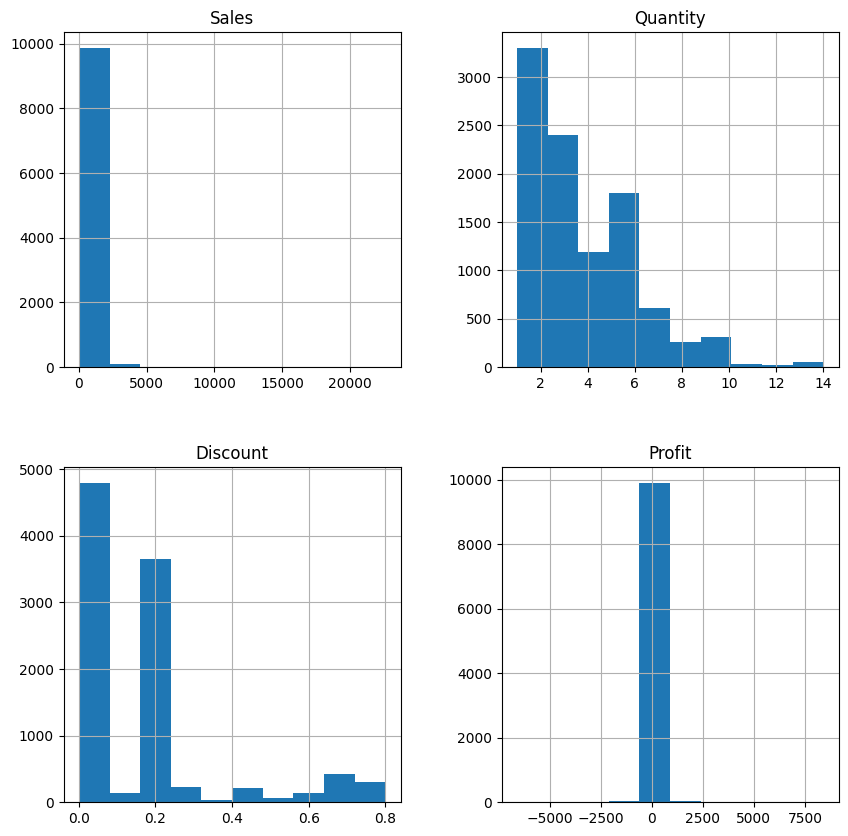

In [ ]:
data.hist(figsize=(10,10))

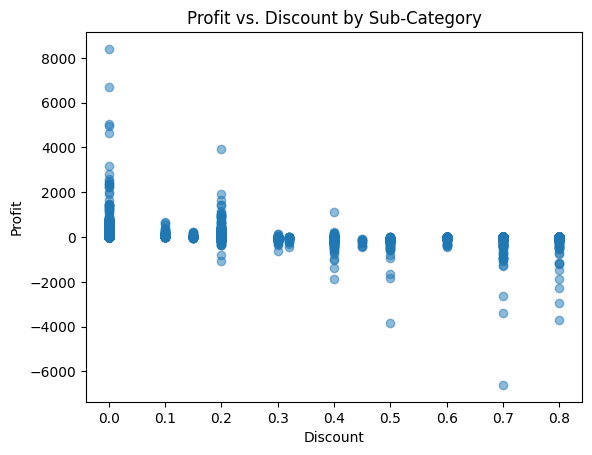

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['Discount'], data['Profit'], alpha=0.5)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs. Discount by Sub-Category')
plt.show()


<ipython-input-22-3eb58abdf567>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Sales', y='Sub_Category', hue='Segment', ci=None, estimator=sum, order=data.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False).index)


<Axes: xlabel='Sales', ylabel='Sub_Category'>

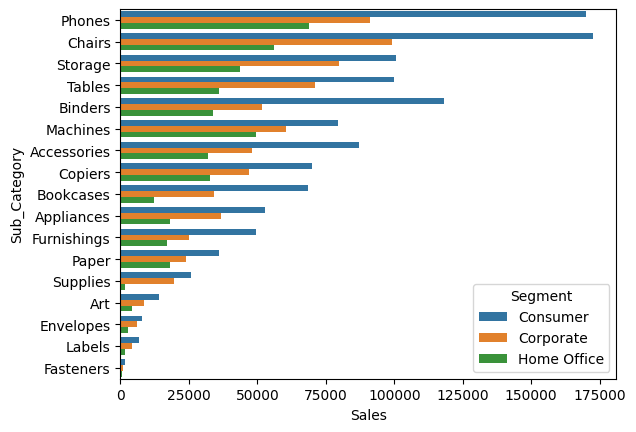

In [ ]:
import seaborn as sns

sns.barplot(data=data, x='Sales', y='Sub_Category', hue='Segment', ci=None, estimator=sum, order=data.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False).index)


In [ ]:
data.to_csv('SampleSuperstore_cleaned.csv', index=False)

Modeling


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

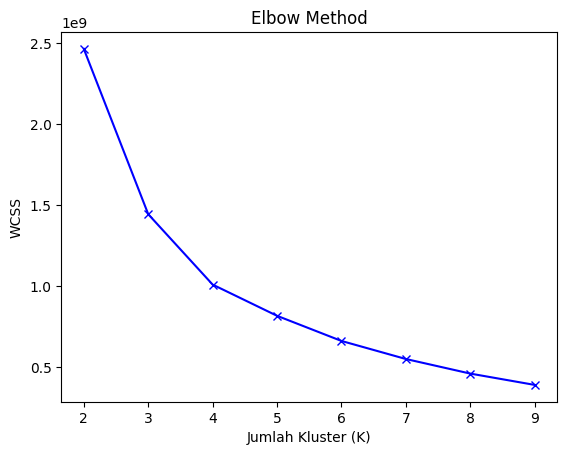

In [ ]:
import warnings
warnings.filterwarnings("ignore")
elbow_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dffinal)
    elbow_scores.append(kmeans.inertia_)

plt.plot(k_range, elbow_scores,"bx-")
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
class Kmeans:
    """The k-means algorithm."""

    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        if 'species' in self.data.columns:
            self.data.drop('species', axis=1, inplace=True)

        # Randomly initialize centroids
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):
            
            if self.verbose:
                time.sleep(3)

            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)

In [ ]:
number_of_clusters = 4
kmeans = Kmeans(n_clusters=number_of_clusters)
kmeans.train(df=dffinal, verbose=False)

In [ ]:
# Extract the results
dffinal['cluster'] = kmeans.clusters
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
all_df = pd.concat([dffinal, centroids])

In [ ]:
all_df.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office', 'Sub_Category_Accessories',
       'Sub_Category_Appliances', 'Sub_Category_Art', 'Sub_Category_Binders',
       'Sub_Category_Bookcases', 'Sub_Category_Chairs', 'Sub_Category_Copiers',
       'Sub_Category_Envelopes', 'Sub_Category_Fasteners',
       'Sub_Category_Furnishings', 'Sub_Category_Labels',
       'Sub_Category_Machines', 'Sub_Category_Paper', 'Sub_Category_Phones',
       'Sub_Category_Storage', 'Sub_Category_Supplies', 'Sub_Category_Tables',
       'cluster'],
      dtype='object')

In [ ]:
# Membuat DataFrame kosong untuk hasil decode
X_train_decoded = pd.DataFrame()

# Kolom-kolom yang akan digabungkan
segment_cols = ['Segment_Corporate', 'Segment_Home Office']
sub_category_cols = ['Sub_Category_Accessories',
       'Sub_Category_Appliances', 'Sub_Category_Art', 'Sub_Category_Binders',
       'Sub_Category_Bookcases', 'Sub_Category_Chairs', 'Sub_Category_Copiers',
       'Sub_Category_Envelopes', 'Sub_Category_Fasteners',
       'Sub_Category_Furnishings', 'Sub_Category_Labels',
       'Sub_Category_Machines', 'Sub_Category_Paper', 'Sub_Category_Phones',
       'Sub_Category_Storage', 'Sub_Category_Supplies', 'Sub_Category_Tables']

# Menambahkan kolom-kolom numerik
X_train_decoded['Sales'] = all_df['Sales']
X_train_decoded['Quantity'] = all_df['Quantity']
X_train_decoded['Discount'] = all_df['Discount']
X_train_decoded['Profit'] = all_df['Profit']
X_train_decoded['cluster'] = all_df['cluster']

# Menggabungkan kolom-kolom yang sama dan menjadikan sebagai satu kolom
X_train_decoded['Segment'] = all_df[segment_cols].idxmax(axis=1).str.split('_', expand=True)[1]
X_train_decoded['Sub_Category'] = all_df[sub_category_cols].idxmax(axis=1).str.split('_', expand=True)[2]
X_train_decoded

,Sales,Quantity,Discount,Profit,cluster,Segment,Sub_Category
0,261.960000,2.000000,0.000000,41.913600,3.0,Corporate,Bookcases
1,731.940000,3.000000,0.000000,219.582000,0.0,Corporate,Chairs
2,14.620000,2.000000,0.000000,6.871400,3.0,Corporate,Labels
3,957.577500,5.000000,0.450000,-383.031000,0.0,Corporate,Tables
4,22.368000,2.000000,0.200000,2.516400,3.0,Corporate,Storage
...,...,...,...,...,...,...,...
9993,243.160000,2.000000,0.000000,72.948000,3.0,Corporate,Appliances
0,959.805987,5.070842,0.144517,88.813111,centroid,Corporate,Chairs
1,11783.502182,5.545455,0.100000,3496.287900,centroid,Corporate,Copiers
2,3364.443666,6.303571,0.120268,575.701619,centroid,Corporate,Machines


2d

In [ ]:
def plot_cluster(cluster_df):
    plot, ax = plt.subplots(3,4,figsize=(55,15),constrained_layout=True)
    cols = ['Sales', 'Quantity', 'Discount', 'Profit']
    category_counts = cluster_df['Segment'].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax[2][2])
    for i,col in enumerate(cols):
        sns.histplot(data=cluster_df, x=col, ax=ax[0][i], kde=True)
        sns.boxplot(data=cluster_df, x=col, ax=ax[1][i])
    # sns.countplot(data=cluster_df, x="gender", ax=ax[2][0])
    sns.countplot(data=cluster_df, x="Segment", ax=ax[2][1])
    # sns.countplot(data=cluster_df, x="shopping_mall", ax=ax[2][3])

In [ ]:
cluster1 = X_train_decoded[X_train_decoded['cluster'] == 0]
cluster2 = X_train_decoded[X_train_decoded['cluster'] == 1]
cluster3 = X_train_decoded[X_train_decoded['cluster'] == 2]
cluster4 = X_train_decoded[X_train_decoded['cluster'] == 3]

In [ ]:
cluster1.describe()

,Sales,Quantity,Discount,Profit
count,112.000000,112.000000,112.000000,112.000000
mean,3364.443666,6.303571,0.120268,575.701619
std,1169.047793,2.507069,0.141577,1152.116847
min,2104.550000,2.000000,0.000000,-6599.978000
25%,2546.915000,4.750000,0.000000,236.628000
50%,2937.130000,6.000000,0.100000,631.092650
75%,4045.608000,8.000000,0.200000,1074.807150
max,8159.952000,13.000000,0.700000,3177.475000


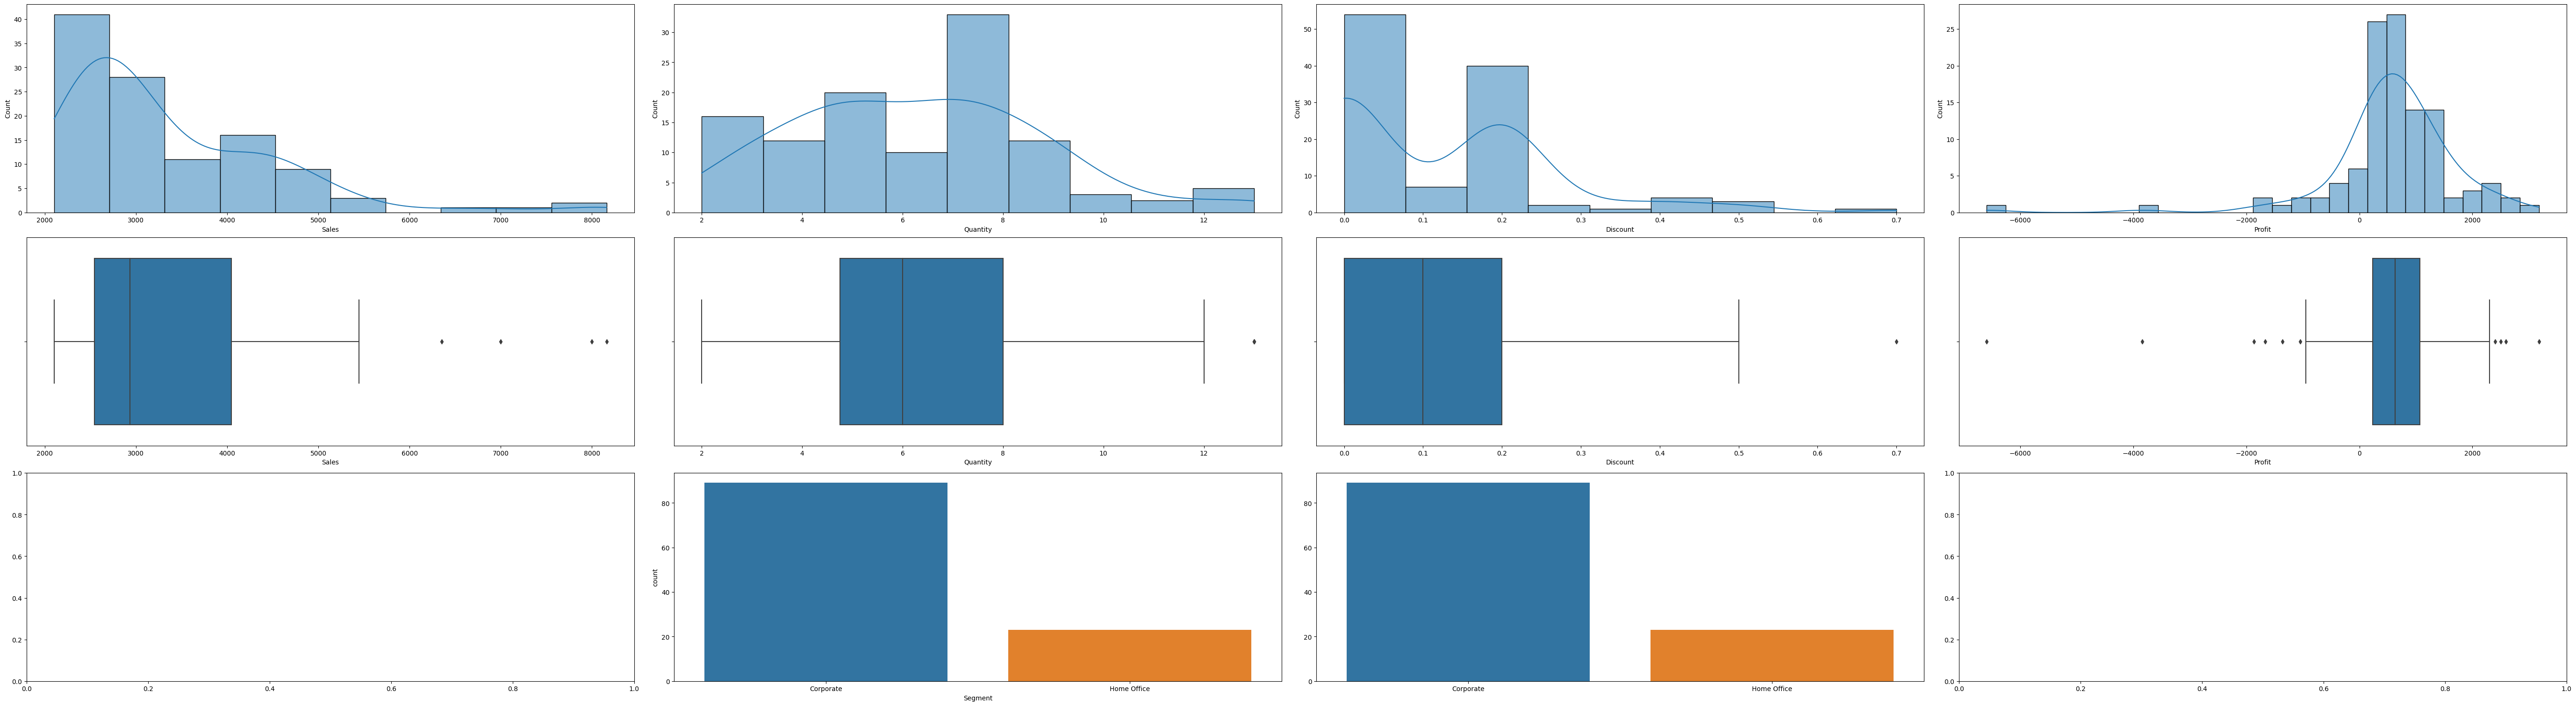

In [ ]:
plot_cluster(cluster1)

Cluster 1

1. Rata-rata penjualan per transaksi pada dataset ini adalah 959.81 unit dengan standar deviasi sebesar 390.90 unit. 

2. Rata-rata produk yang dibeli per transaksi adalah 5.07 produk dengan standar deviasi sebesar 2.43 produk. 

3. Diskon rata-rata yang diberikan per transaksi adalah 0.14 dengan standar deviasi sebesar 0.16. 

4. Rata-rata keuntungan yang dihasilkan per transaksi adalah 88.81 dollar dengan standar deviasi sebesar 350.81 dollar. 

In [ ]:
cluster2.describe()

,Sales,Quantity,Discount,Profit
count,8880.000000,8880.000000,8880.000000,8880.000000
mean,96.273462,3.616441,0.158092,10.900868
std,119.644520,2.131492,0.211443,51.095282
min,0.444000,1.000000,0.000000,-1181.282400
25%,15.232000,2.000000,0.000000,1.670400
50%,41.650000,3.000000,0.200000,7.408600
75%,128.400000,5.000000,0.200000,21.582400
max,590.058000,14.000000,0.800000,240.859500


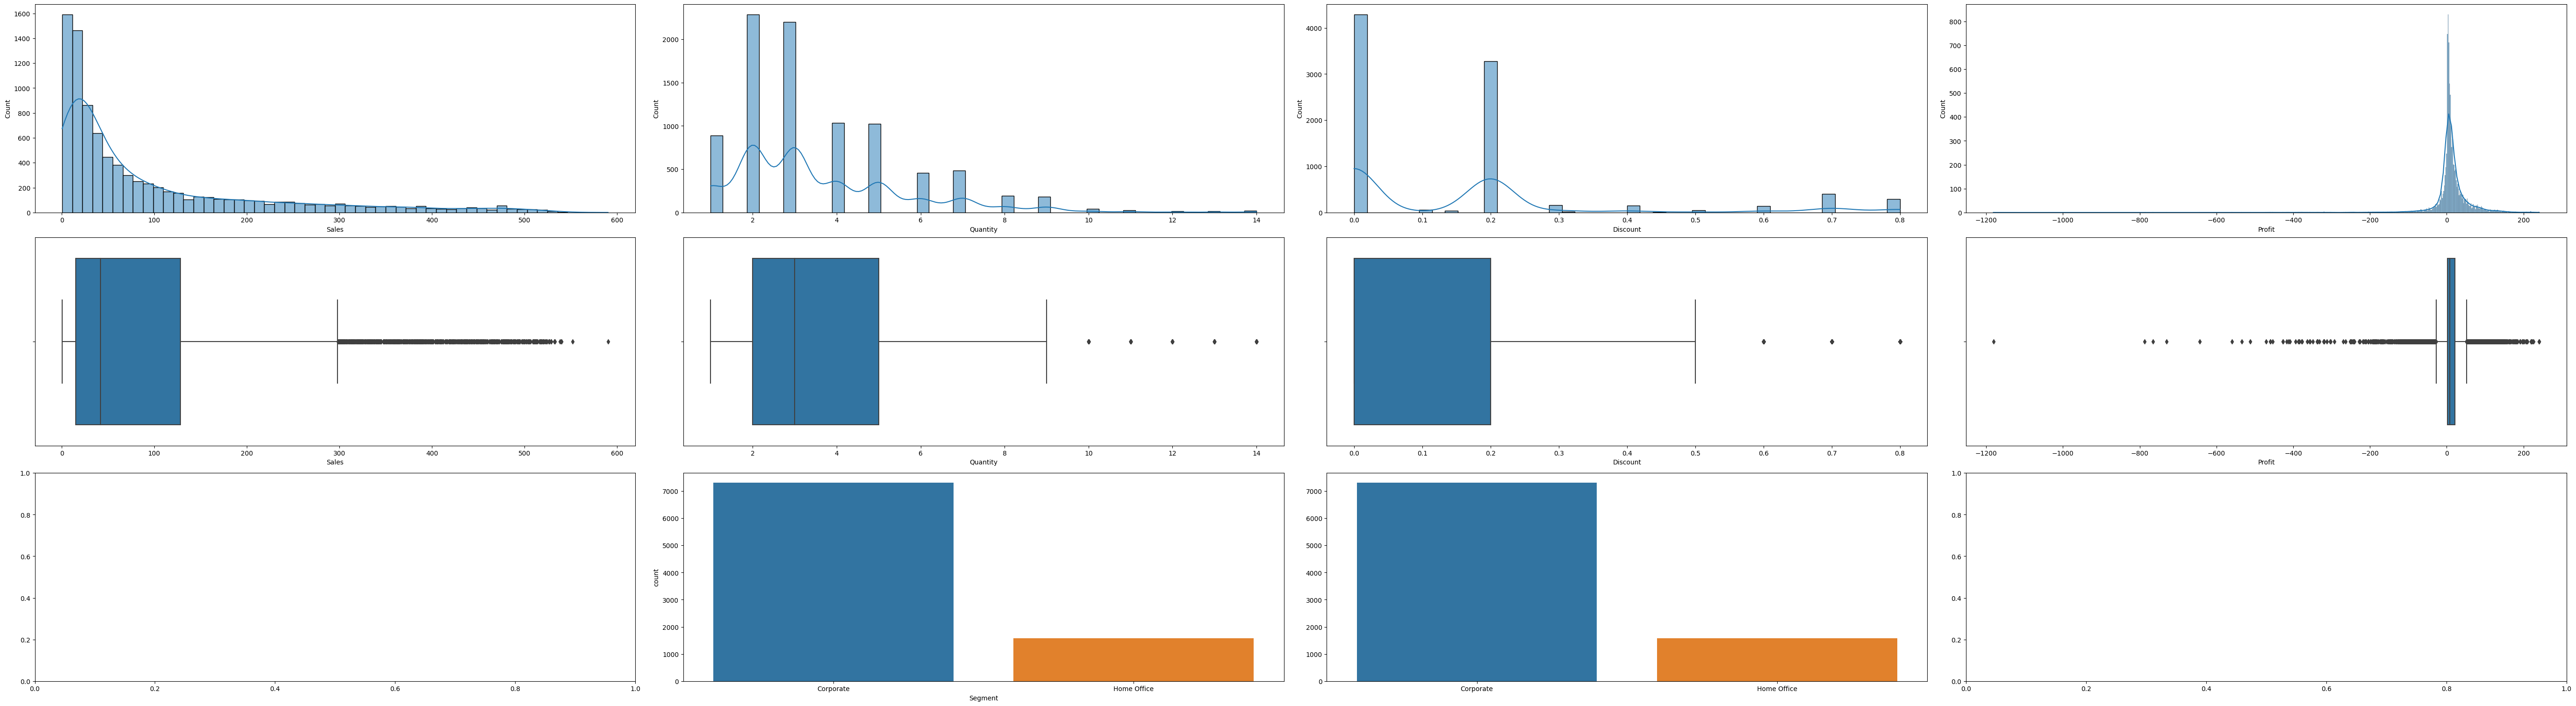

In [ ]:
plot_cluster(cluster2)

Cluster 2 :
1. Rata-rata penjualan per transaksi pada dataset ini adalah 11783.50 unit dengan standar deviasi sebesar 4552.05 unit. 

2. Rata-rata produk yang dibeli per transaksi adalah 5.54 produk dengan standar deviasi sebesar 2.69 produk.

3. Diskon rata-rata yang diberikan per transaksi adalah 0.10 dengan standar deviasi sebesar 0.18. 

4. Rata-rata keuntungan yang dihasilkan per transaksi adalah 3496.28 dollar dengan standar deviasi sebesar 2932.72 dollar.

In [ ]:
cluster3.describe()

,Sales,Quantity,Discount,Profit
count,11.000000,11.000000,11.000000,11.000000
mean,11783.502182,5.545455,0.100000,3496.287900
std,4552.052500,2.696799,0.184391,2932.720643
min,8187.650000,3.000000,0.000000,-1811.078400
25%,8924.940000,4.000000,0.000000,1742.989300
50%,9892.740000,5.000000,0.000000,3919.988800
75%,12599.964000,5.500000,0.100000,4993.177800
max,22638.480000,13.000000,0.500000,8399.976000


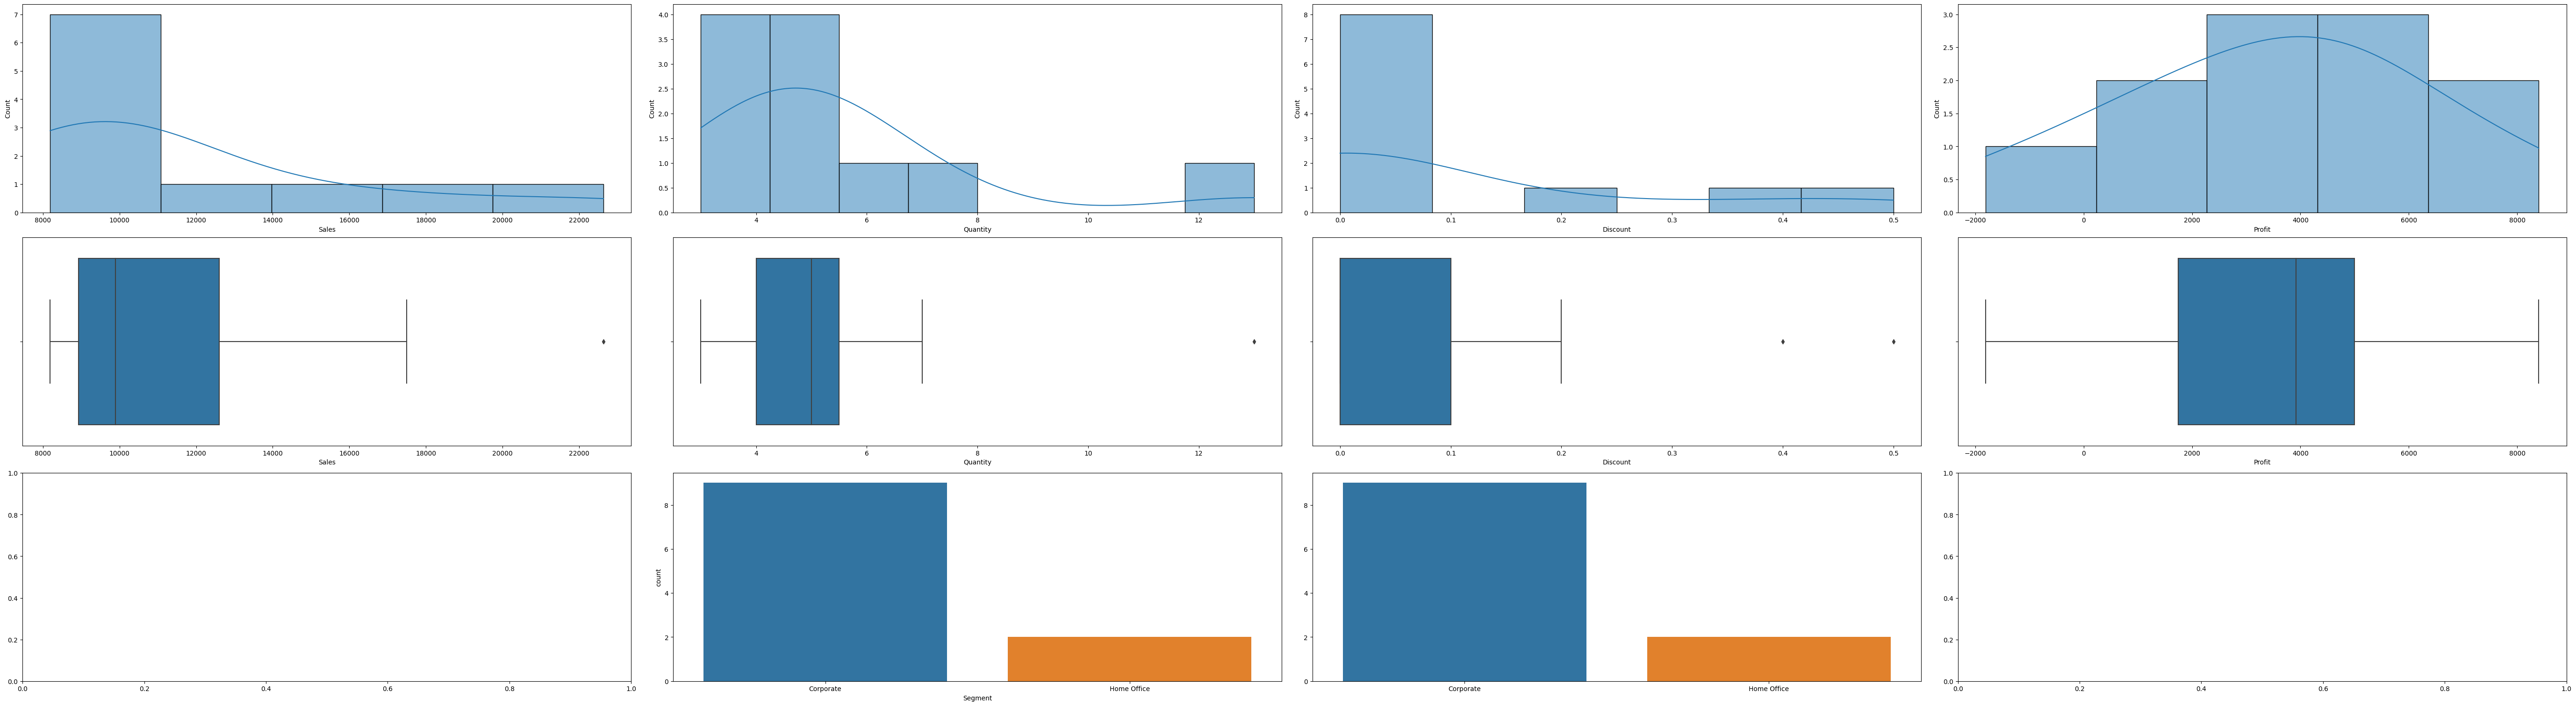

In [ ]:
plot_cluster(cluster3)

Cluster 3:
1. Rata-rata penjualan per transaksi pada dataset ini adalah 96.27 unit dengan standar deviasi sebesar 119.64 unit. 

2. Rata-rata produk yang dibeli per transaksi adalah 3.61 produk dengan standar deviasi sebesar 2.13 produk.

3. Diskon rata-rata yang diberikan per transaksi adalah 0.15 dengan standar deviasi sebesar 0.21. 

4. Rata-rata keuntungan yang dihasilkan per transaksi adalah 10.90 dollar dengan standar deviasi sebesar 51.09 dollar.

In [ ]:
cluster4.describe()

,Sales,Quantity,Discount,Profit
count,974.000000,974.000000,974.000000,974.000000
mean,959.805987,5.070842,0.144517,88.813111
std,390.900891,2.429713,0.161385,350.814036
min,511.840000,1.000000,0.000000,-3701.892800
25%,647.856000,3.000000,0.000000,20.971800
50%,844.008000,5.000000,0.200000,111.202950
75%,1164.954000,7.000000,0.200000,235.463325
max,2549.985000,14.000000,0.800000,899.982000


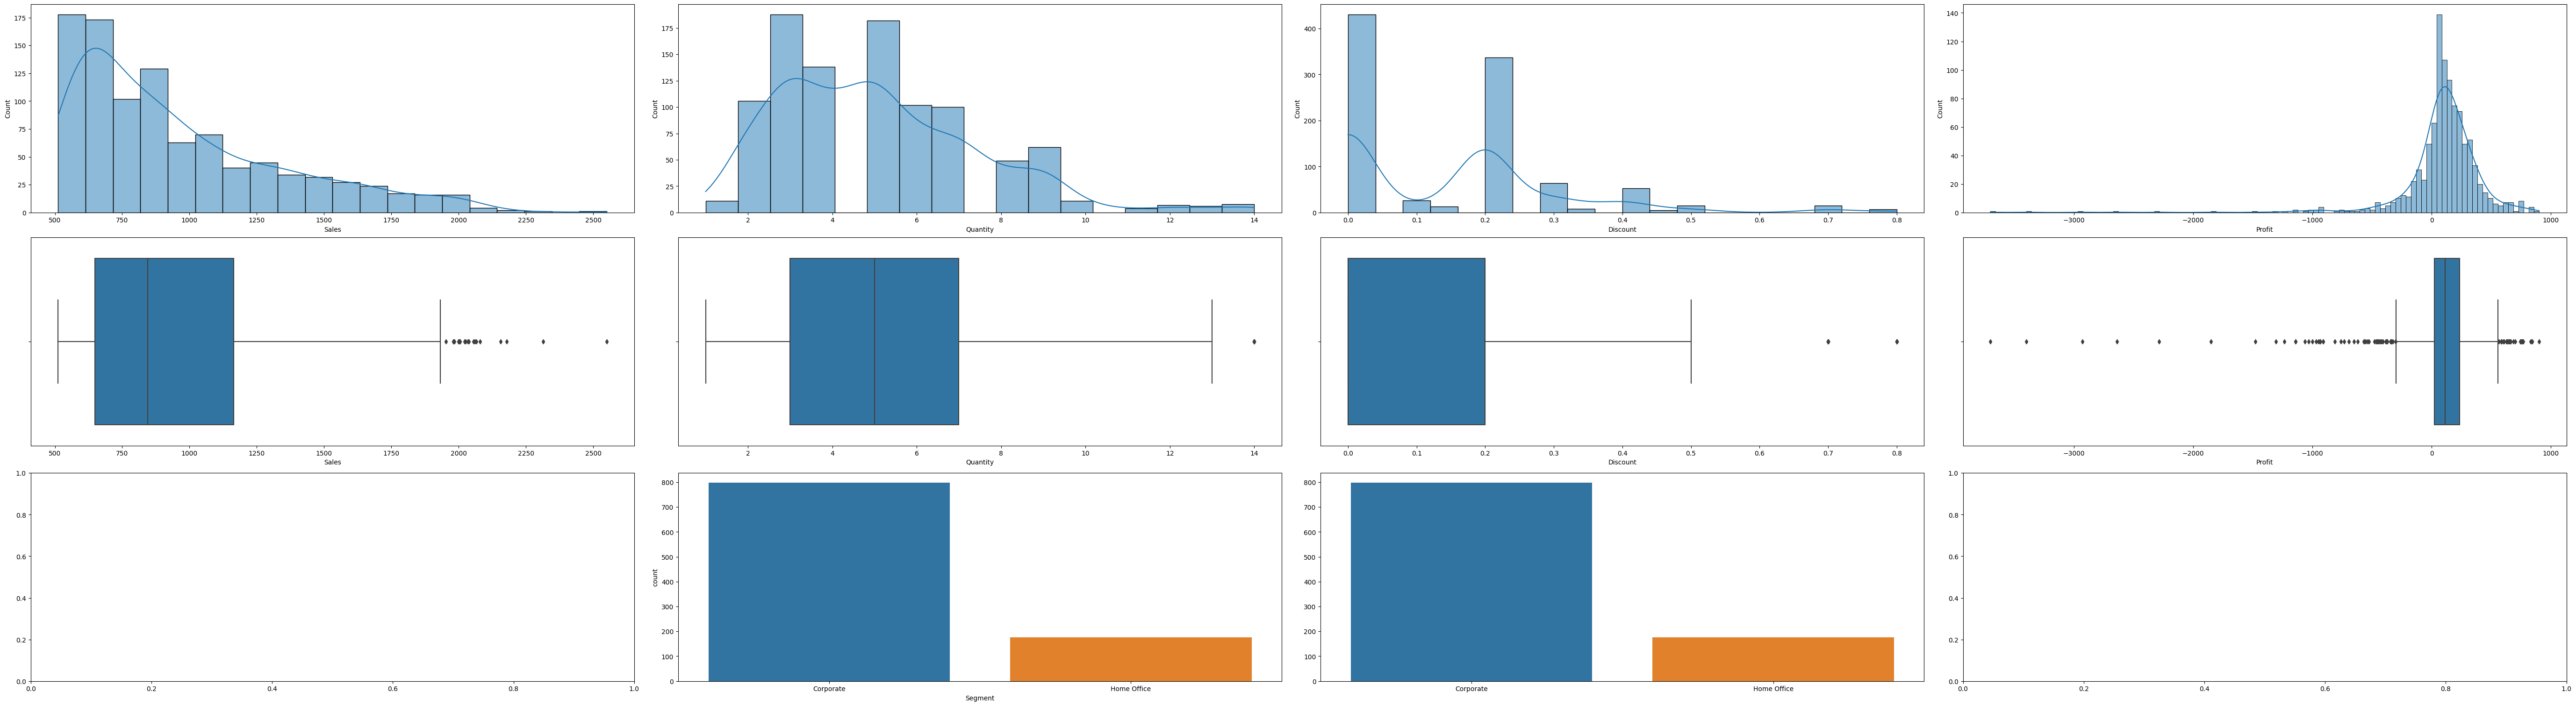

In [ ]:
plot_cluster(cluster4)

Cluster 4:
1. Rata-rata penjualan per transaksi pada dataset ini adalah 3364.44 unit dengan standar deviasi sebesar 1169.04 unit. 

2. Rata-rata produk yang dibeli per transaksi adalah 6.30 produk dengan standar deviasi sebesar 2.50 produk.

3. Diskon rata-rata yang diberikan per transaksi adalah 0.12 dengan standar deviasi sebesar 0.14. 

4. Rata-rata keuntungan yang dihasilkan per transaksi adalah 575.50 dollar dengan standar deviasi sebesar 1152.11 dollar.

3d

In [ ]:
import plotly.express as px

In [ ]:
px.scatter_3d(X_train_decoded, x='Sales', y='Quantity', z='Discount', color='cluster',color_continuous_scale=['#ADFF2F', '#19A3E8', '#FF5A44', '#FFD326'])

In [ ]:
px.scatter_3d(X_train_decoded, x='Segment', y='Profit', z='Quantity', color='cluster',color_continuous_scale=['#ADFF2F', '#19A3E8', '#FF5A44', '#FFD326'])

Evaluation

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(dffinal.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Calinski-Harabasz Index
ch_score= calinski_harabasz_score(dffinal.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Davies-Bouldin Index
db_score= davies_bouldin_score(dffinal.drop('cluster', axis=1), kmeans.clusters)

# Create dataframe for metrics and scores
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores = [silhouette_avg, ch_score, db_score]
df_scores = pd.DataFrame({'Metric': metrics, 'Score': scores})

# reset index dataframe
df_scores = df_scores.reset_index(drop=True)

# ubah nama axis pada index dan kolom
df_scores = df_scores.rename_axis('', axis=0).rename_axis('Metrics', axis=1)

# Display dataframe as table without index column
display(df_scores.style.hide_index())


Metric,Score
Silhouette Score,0.786626
Calinski-Harabasz Score,11239.833288
Davies-Bouldin Score,0.630532


Dapat disimpulkan bahwa hasil clustering yang didapatkan cukup baik. Silhouette Score memiliki nilai 0.786626 yang mendekati nilai maksimum 1, menunjukkan bahwa setiap data pada cluster relatif terpisah dari cluster lain. Calinski-Harabasz Score sebesar 11239.833288 menunjukkan bahwa antara cluster terdapat perbedaan yang cukup signifikan. Davies-Bouldin Score dengan nilai 0.630532 menunjukkan bahwa cluster yang terbentuk cukup kompak dan terpisah satu sama lain. Namun, perlu dicatat bahwa nilai metric ini sebaiknya tidak dijadikan satu-satunya patokan dalam mengevaluasi hasil clustering, karena kriteria yang digunakan dalam masing-masing metric juga memiliki kelemahan dan keterbatasan.

Deployment

In [ ]:
X_train_decoded.to_csv('Superstore_new.csv')

# DATASET HEART DISEASE

***Bussines* *Understadning***

Data Heart Disease terdiri dari informasi umum seperti jenis kelamin, usia, dan tingkat pendidikan, serta informasi kesehatan seperti merokok atau tidak, jumlah rokok per hari, riwayat stroke dan diabetes, tekanan darah, tingkat kolesterol, dan indeks massa tubuh.

***Tujuan***

Membantu dokter atau pihak medis untuk melakukan pencegahan terhadap penyakit jantung pada pasien.
Mengetahui faktor-faktor yang mempengaruhi terjadinya penyakit jantung pada seseorang.

***Data Understanding***

In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('heart_disease.csv')

df

FileNotFoundError: ignored

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.head()

***Data Explore***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

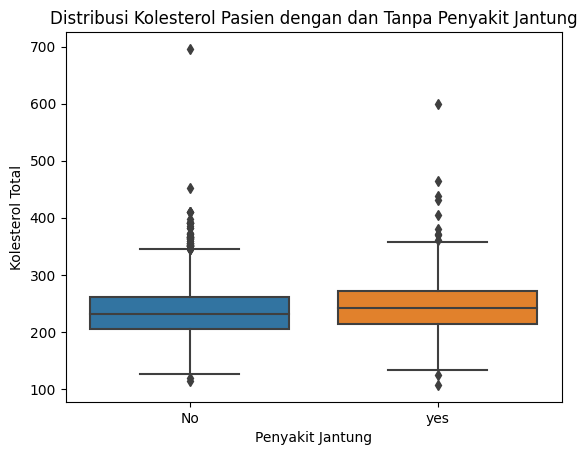

In [ ]:
# Membaca file CSV dan menyimpannya ke dalam DataFrame
df = pd.read_csv('heart_disease.csv')

# Visualisasi distribusi kolesterol
sns.boxplot(data=df, x='heart_stroke', y='totChol')
plt.xlabel('Penyakit Jantung')
plt.ylabel('Kolesterol Total')
plt.title('Distribusi Kolesterol Pasien dengan dan Tanpa Penyakit Jantung')

# Menampilkan visualisasi
plt.show()

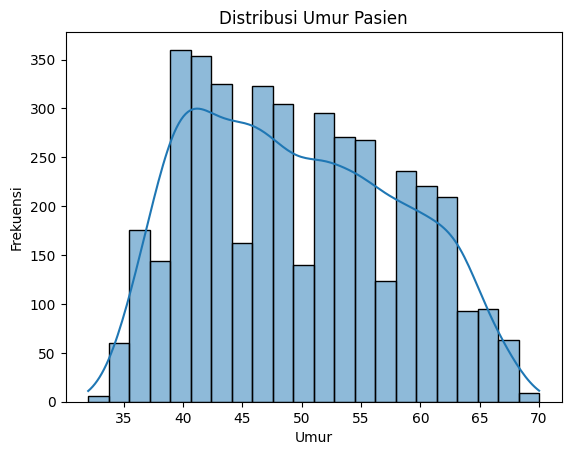

In [ ]:
# Visualisasi distribusi umur
sns.histplot(df['age'], kde=True)
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.title('Distribusi Umur Pasien')

plt.show()

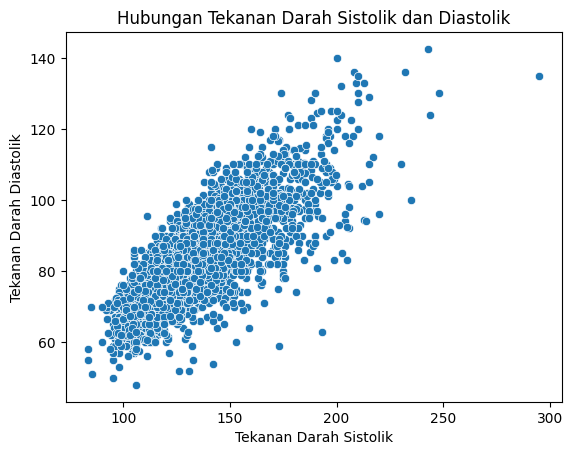

In [ ]:
# Visualisasi hubungan tekanan darah sistolik dan diastolik
sns.scatterplot(data=df, x='sysBP', y='diaBP')
plt.xlabel('Tekanan Darah Sistolik')
plt.ylabel('Tekanan Darah Diastolik')
plt.title('Hubungan Tekanan Darah Sistolik dan Diastolik')

plt.show()

***Data Preparation***

In [ ]:
#Menandai baris yang duplikat berdasarkan semua kolom
duplikat = df.duplicated()

# Menampilkan baris yang duplikat
print(df[duplikat])

In [ ]:
df.isna().sum()

In [ ]:
# Menghapus baris dengan data kosong
df.dropna(inplace=True)

# Menghapus kolom "education" dan "cigsPerDay" karena tidak relevan
df = df.drop(['education', 'cigsPerDay'], axis=1)

# Mengganti nilai "No" pada kolom "Heart_ stroke" dengan 0 dan "Yes" dengan 1
df['heart_stroke'] = df['heart_stroke'].replace({'No': 0, 'yes': 1})

df['prevalentStroke'] = df['prevalentStroke'].replace({'no': 0})
df['prevalentStroke'] = df['prevalentStroke'].replace({'yes': 1})

df

In [ ]:
df.isna().sum()

In [ ]:
# Membuat dummy variables untuk kolom "Gender"
df = pd.get_dummies(df, columns=['Gender'])

# Menampilkan DataFrame yang sudah dibuat dummy variables untuk kolom "Gender"
print(df)

In [ ]:
df.to_csv('cleaned_heart.csv', index=False)

## ***KNN***

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# membaca dataset dari file CSV
df2 = pd.read_csv('cleaned_heart.csv')

# menampilkan 5 baris pertama dari dataset
df2.head()

,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,heart_stroke,Gender_Female,Gender_Male
0,39,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,0,1
1,46,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,1,0
2,48,1,0,0,0,0,245,127.5,80.0,25.34,75,70,0,0,1
3,61,1,0,0,1,0,225,150.0,95.0,28.58,65,103,1,1,0
4,46,1,0,0,0,0,285,130.0,84.0,23.10,85,85,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

# memisahkan atribut dan label
X = df2.drop('heart_stroke', axis=1)
y = df2['heart_stroke']

# membagi dataset menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# membuat model KNN dengan nilai K=5
knn = KNeighborsClassifier(n_neighbors=5)

# melatih model dengan data training
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
# melakukan prediksi terhadap data testing
y_pred = knn.predict(X_test)

# menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# print('Akurasi:', accuracy)
print(classification_report(y_test,y_pred,))

# Calculate the AUC score
y_prob = knn.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

# Print the AUC score
print("AUC Score:", auc)

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       623
           1       0.30      0.11      0.16       109

    accuracy                           0.83       732
   macro avg       0.58      0.53      0.53       732
weighted avg       0.78      0.83      0.79       732

AUC Score: 0.6003725683655587


              precision    recall  f1-score   support

           0       0.86      0.96      0.90       623
           1       0.30      0.11      0.16       109

    accuracy                           0.83       732
   macro avg       0.58      0.53      0.53       732
weighted avg       0.78      0.83      0.79       732



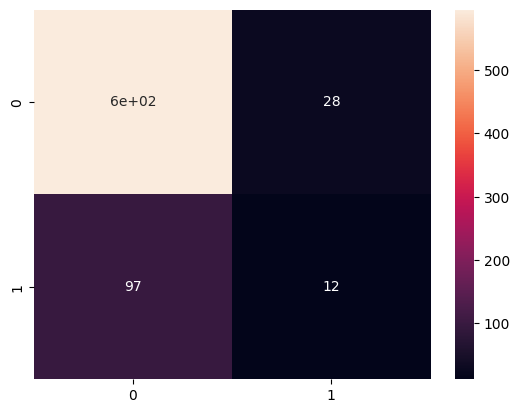

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True)

# Print a classification report
cr = classification_report(y_test, y_pred)
print(cr)

## ***NAIVE BAYES***

In [ ]:
#Import Library
import pandas as pd
from sklearn.naive_bayes import GaussianNB

df2 = pd.read_csv('cleaned_heart.csv')
df2.head()

,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,heart_stroke,Gender_Female,Gender_Male
0,39,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,0,1
1,46,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,1,0
2,48,1,0,0,0,0,245,127.5,80.0,25.34,75,70,0,0,1
3,61,1,0,0,1,0,225,150.0,95.0,28.58,65,103,1,1,0
4,46,1,0,0,0,0,285,130.0,84.0,23.10,85,85,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

# memilih variabel target dan predictor
target = 'heart_stroke'
predictors = ['age', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Gender_Female', 'Gender_Male']

# membagi dataset menjadi data training dan data testing
train_data, test_data, train_target, test_target = train_test_split(df2[predictors], df2[target], test_size=0.3, random_state=42)

# membuat model Naive Bayes
nb = GaussianNB()

# melatih model dengan data training
nb.fit(train_data, train_target)

# melakukan prediksi terhadap data testing
test_pred = nb.predict(test_data)

# menghitung nilai metrik evaluasi
accuracy = accuracy_score(test_target, test_pred)
precision = precision_score(test_target, test_pred)
recall = recall_score(test_target, test_pred)
f1 = f1_score(test_target, test_pred)
auc = roc_auc_score(test_target, test_pred)


# menampilkan classification report
print(classification_report(test_target, test_pred))

print("Accuracy :", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1)
print("AUC Score :", auc)


              precision    recall  f1-score   support

           0       0.86      0.93      0.89       923
           1       0.34      0.18      0.24       174

    accuracy                           0.81      1097
   macro avg       0.60      0.56      0.57      1097
weighted avg       0.78      0.81      0.79      1097

Accuracy : 0.8140382862351869
Precision : 0.3404255319148936
Recall : 0.1839080459770115
F1 Score : 0.23880597014925373
AUC Score : 0.5583678908108243


## ***C4.5***

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [ ]:
df = pd.read_csv('cleaned_heart.csv')
df.head()

,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke,Gender_Female,Gender_Male
0,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,1
1,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0
2,48,1,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,1
3,61,1,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,0
4,46,1,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,0


In [ ]:
df_del_col = df.drop('Gender_Female', axis=1)
df_final = df_del_col.rename(columns={'Gender_Male':'Gender'})
df_final = df_final.sample(n=1000, random_state=42)
x = df_final.drop('Heart_ stroke',axis=1)
y = df_final['Heart_ stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Modeling

###Pre-Processing

#####Encoding

In [ ]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

#####Scalling

In [ ]:
# Lakukan scaling pada data train
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Gunakan objek scaler yang sama untuk melakukan scaling pada data test
x_test_scaled = scaler.transform(x_test)

###C4.5 Impelementation

In [ ]:
class Node:
    def __init__(self):
        
        # links to the left and right child nodes
        self.right = None
        self.left = None
        
        # derived from splitting criteria
        self.column = None
        self.threshold = None
        
        # probability for object inside the Node to belong for each of the given classes
        self.probas = None
        # depth of the given node
        self.depth = None
        
        # if it is the root Node or not
        self.is_terminal = False

In [ ]:
class DecisionTreeClassifier:
    def __init__(self, max_depth = 3, min_samples_leaf = 1, min_samples_split = 2):
        
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        
        self.classes = None
        
        # Decision tree itself
        self.Tree = None
    
    def nodeProbas(self, y):
        '''
        Calculates probability of class in a given node
        '''
        
        probas = []
        
        # for each unique label calculate the probability for it
        for one_class in self.classes:
            proba = y[y == one_class].shape[0] / y.shape[0]
            probas.append(proba)
        return np.asarray(probas)

    def gini(self, probas):
        '''
        Calculates gini criterion
        '''
        
        return 1 - np.sum(probas**2)
    
    def calcImpurity(self, y):
        '''
        Wrapper for the impurity calculation. Calculates probas first and then passses them
        to the Gini criterion
        '''
        
        return self.gini(self.nodeProbas(y))
    
    def calcBestSplit(self, X, y):
        '''
        Calculates the best possible split for the concrete node of the tree
        '''
        
        bestSplitCol = None
        bestThresh = None
        bestInfoGain = -999
        
        impurityBefore = self.calcImpurity(y)
        
        # for each column in X
        for col in range(X.shape[1]):
            x_col = X[:, col]
            
            # for each value in the column
            for x_i in x_col:
                threshold = x_i
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                
                if y_right.shape[0] == 0 or y_left.shape[0] == 0:
                    continue
                    
                # calculate impurity for the right and left nodes
                impurityRight = self.calcImpurity(y_right)
                impurityLeft = self.calcImpurity(y_left)
                
                # calculate information gain
                infoGain = impurityBefore
                infoGain -= (impurityLeft * y_left.shape[0] / y.shape[0]) + (impurityRight * y_right.shape[0] / y.shape[0])
                
                # is this infoGain better then all other?
                if infoGain > bestInfoGain:
                    bestSplitCol = col
                    bestThresh = threshold
                    bestInfoGain = infoGain
                    
        
        # if we still didn't find the split
        if bestInfoGain == -999:
            return None, None, None, None, None, None
        
        # making the best split
        
        x_col = X[:, bestSplitCol]
        x_left, x_right = X[x_col <= bestThresh, :], X[x_col > bestThresh, :]
        y_left, y_right = y[x_col <= bestThresh], y[x_col > bestThresh]
        
        return bestSplitCol, bestThresh, x_left, y_left, x_right, y_right
                
                
                
    
    def buildDT(self, X, y, node):
        '''
        Recursively builds decision tree from the top to bottom
        '''
        
        # checking for the terminal conditions
        
        if node.depth >= self.max_depth:
            node.is_terminal = True
            return
        
        if X.shape[0] < self.min_samples_split:
            node.is_terminal = True
            return
        
        if np.unique(y).shape[0] == 1:
            node.is_terminal = True
            return
        
        # calculating current split
        splitCol, thresh, x_left, y_left, x_right, y_right = self.calcBestSplit(X, y)
        
        if splitCol is None:
            node.is_terminal = True
            
        if x_left.shape[0] < self.min_samples_leaf or x_right.shape[0] < self.min_samples_leaf:
            node.is_terminal = True
            return
        
        node.column = splitCol
        node.threshold = thresh
        
        # creating left and right child nodes
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.nodeProbas(y_left)
        
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.nodeProbas(y_right)
        
        # splitting recursevely
        self.buildDT(x_right, y_right, node.right)
        self.buildDT(x_left, y_left, node.left)
        
        
        
        
    
    def fit(self, X, y):
        '''
        Standard fit function to run all the model training
        '''
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
        
        self.classes = np.unique(y)
        # root node creation
        self.Tree = Node()
        self.Tree.depth = 1
        self.Tree.probas = self.nodeProbas(y)
        
        self.buildDT(X, y, self.Tree)
    
    def predictSample(self, x, node):
        '''
        Passes one object through decision tree and return the probability of it to belong to each class
        '''
       
    
        # if we have reached the terminal node of the tree
        if node.is_terminal:
            return node.probas
        
        if x[node.column] > node.threshold:
            probas = self.predictSample(x, node.right)
        else:
            probas = self.predictSample(x, node.left)
            
        return probas
        
        
    
    def predict(self, X):
        '''
        Returns the labels for each X
        '''
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
            
        predictions = []
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predictions.append(pred)
        
        return np.asarray(predictions)
        

In [ ]:
# definisikan model Decission Tree Classifier
dtc = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=2, min_samples_split=2)

# latih model Decission Tree Classifier
dtc.fit(x_train, y_train)

# evalusasi performa model menggunakan data uji
dtc_pred = dtc.predict(x_test)

#Evaluation

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%)
K-Nearest Neighbor,83.666667,35.294118,13.636364,54.669744


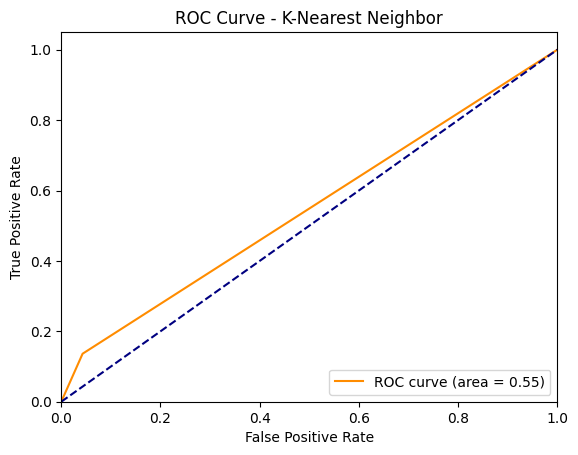

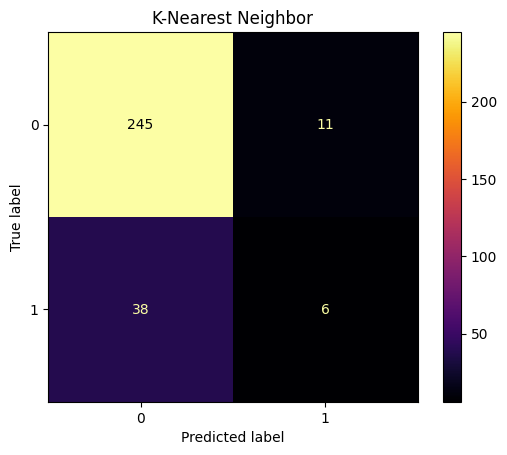

In [ ]:
# inisialisasi model Gaussian Naive Bayes
model = dtc
model_name = 'K-Nearest Neighbor'

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []

# prediksi target variabel pada data uji
y_pred = model.predict(x_test)

# hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# hitung nilai roc-auc
roc = roc_auc_score(y_test, y_pred)

# hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
fpr, tpr, _ = roc_curve(y_test, y_pred)

# tampilkan kurva roc
fig, ax = plt.subplots()
roc_display = ax.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc)
roc_display = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
roc_display = ax.set_xlim([0.0, 1.0])
roc_display = ax.set_ylim([0.0, 1.05])
roc_display = ax.set_xlabel('False Positive Rate')
roc_display = ax.set_ylabel('True Positive Rate')
roc_display = ax.set_title('ROC Curve - ' + model_name)
roc_display = ax.legend(loc="lower right")

# tampilkan confusion matrix
fig, ax = plt.subplots()
cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax, cmap='inferno')
cm_display.ax_.set_title(model_name)

# hitung true negative, false positive, false negative, true positive
tn, fp, fn, tp = cm.ravel()

# hitung precision dan recall
ac = (tp + tn) / (tp + fp + fn + tn)
pr = tp / (tp + fp)
rc = tp / (tp + fn)

# simpan hasil evaluasi pada list
acc_scores.append(ac * 100)
pre_scores.append(pr * 100)
rec_scores.append(rc * 100)
roc_scores.append(roc * 100)

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': [model_name],
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)